In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

print("Shape celsius:", celsius.shape)
print("Shape fahrenheit:", fahrenheit.shape)
print("Pares de ejemplo:")
for c, f in zip(celsius, fahrenheit):
    print(f"{c} °C -> {f} °F")


Shape celsius: (7,)
Shape fahrenheit: (7,)
Pares de ejemplo:
-40.0 °C -> -40.0 °F
-10.0 °C -> 14.0 °F
0.0 °C -> 32.0 °F
8.0 °C -> 46.0 °F
15.0 °C -> 59.0 °F
22.0 °C -> 72.0 °F
38.0 °C -> 100.0 °F


In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss="mean_squared_error"
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
history = model.fit(
    celsius,
    fahrenheit,
    epochs=500,
    verbose=False
)

loss_values = history.history["loss"]
print("Pérdida final:", loss_values[-1])


Pérdida final: 10.133708000183105


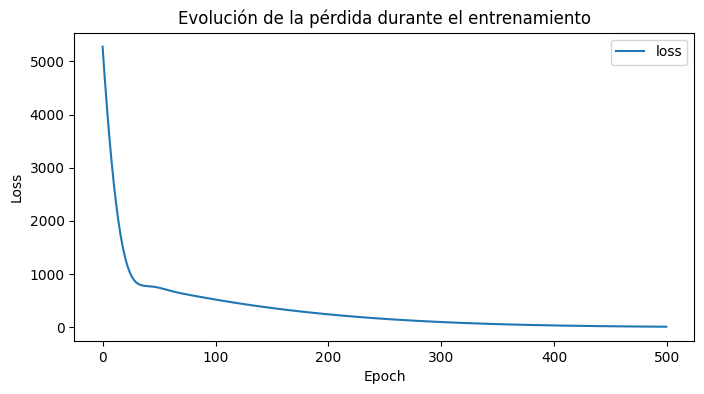

In [4]:
loss_df = pd.DataFrame(history.history)
ax = loss_df.plot(figsize=(8, 4))
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Evolución de la pérdida durante el entrenamiento")
plt.show()


In [5]:
celsius_test = np.array([-40, 0, 25, 38, 100], dtype=float)
fahrenheit_pred = model.predict(celsius_test)

for c, f_pred in zip(celsius_test, fahrenheit_pred):
    print(f"{c} °C -> predicción: {f_pred[0]:.2f} °F")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
-40.0 °C -> predicción: -44.29 °F
0.0 °C -> predicción: 28.74 °F
25.0 °C -> predicción: 74.38 °F
38.0 °C -> predicción: 98.11 °F
100.0 °C -> predicción: 211.30 °F


In [6]:
w = model.layers[0].get_weights()[0][0][0]
b = model.layers[0].get_weights()[1][0]

print("Peso (pendiente):", w)
print("Bias (intercepto):", b)
print(f"Ecuación aproximada: F ≈ {w:.2f} * C + {b:.2f}")


Peso (pendiente): 1.8256476
Bias (intercepto): 28.735296
Ecuación aproximada: F ≈ 1.83 * C + 28.74
